# Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import ticker

# Temps plein

In [33]:
df_temps_plein = pd.read_csv("clean_temps_plein.csv")

In [34]:
df_temps_plein

,coût total employeur,salaire brut,rémunération avant impôt,rémunération après impôt,cout marginal employeur,net apres impots marginal,tx prelevement marginal,tx prelevement total,revenu net imposable
0,87.724305,65.614154,30.000000,30.0,67.724305,30.0,0.56,0.658018,324.000000
1,100.763255,78.246836,40.000000,40.0,13.038950,10.0,0.23,0.603029,432.000000
2,113.802204,90.879519,50.000000,50.0,13.038950,10.0,0.23,0.560640,540.000000
3,126.841154,103.512202,60.000000,60.0,13.038950,10.0,0.23,0.526967,648.000000
4,139.880104,116.144884,70.000000,70.0,13.038950,10.0,0.23,0.499571,756.000000
...,...,...,...,...,...,...,...,...,...
495,38748.326744,27421.354173,21906.366840,14100.0,690.104425,200.0,0.71,0.636113,236588.761872
496,39438.736564,27918.674430,22304.421974,14300.0,690.409820,200.0,0.71,0.637412,240887.757315
497,40128.899732,28415.817017,22702.334900,14500.0,690.163168,200.0,0.71,0.638664,245185.216923
498,40819.144182,28913.018154,23100.294690,14700.0,690.244450,200.0,0.71,0.639875,249483.182653


In [35]:
def custom_smic_formatter(x, pos):
    if 1360 < x < 1405:
        return f"{x:.0f}\nSMIC"
    else:
        return f"{x:.0f}"

In [36]:
print(plt.style.available)
plt.style.use("ggplot")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


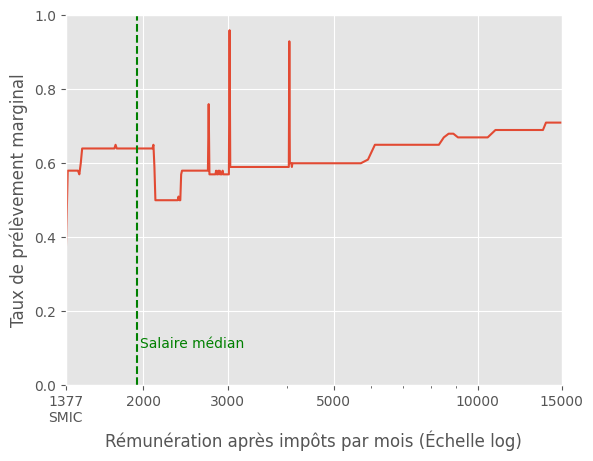

In [89]:
fig, ax = plt.subplots()
plt.grid(True)
plt.ylim(0,1)
plt.xlim(1377,15000)
ax.plot(df_temps_plein["rémunération après impôt"], df_temps_plein["tx prelevement marginal"].astype(float).round(2))
plt.xlabel("Rémunération après impôts par mois (Échelle log)")
plt.ylabel("Taux de prélèvement marginal")
# plt.axvline(x=1400, color="b", linestyle="--")
# plt.text(1300, -0.057, "SMIC", alpha=0.7)

plt.axvline(x=1940, color='g', linestyle='--')
plt.text(1970,0.1, 'Salaire médian', color='g')
plt.xscale("log")
ax.xaxis.set_major_locator(ticker.FixedLocator([1377, 2000,3000,5000,10000,15000]))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(custom_smic_formatter))
plt.show()

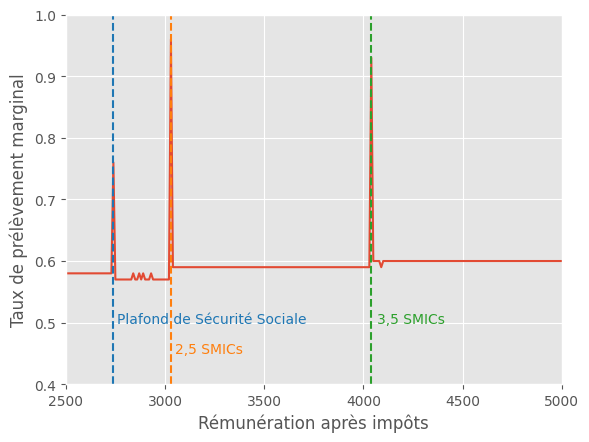

In [42]:
cmap = plt.color_sequences['tab10']

fig, ax = plt.subplots()
plt.ylim(0.4,1)
plt.xlim(2500,5000)
ax.plot(df_temps_plein["rémunération après impôt"], df_temps_plein["tx prelevement marginal"])
plt.xlabel("Rémunération après impôts")
plt.ylabel("Taux de prélèvement marginal")
plt.axvline(x=2740, color=cmap[0], linestyle='--')
plt.text(2760,0.5, 'Plafond de Sécurité Sociale', color=cmap[0])
plt.axvline(x=3030, color=cmap[1], linestyle='--')
plt.text(3050,0.45, '2,5 SMICs', color=cmap[1])
plt.axvline(x=4040, color=cmap[2], linestyle='--')
plt.text(4070,0.5, '3,5 SMICs', color=cmap[2])
plt.show()

<!-- On observe aussi une grosse bosse après avoir atteint le SMIC, aux 1398€ mensuels nets. -->

Avec le "Plafond de Sécurité Sociale" (3864€ bruts, ~2720€ nets après impôts), il y a l'introduction de la contribution à l'équilibre général (0.21%+0.14%).

À 2.5 SMIC bruts (~3030€ nets après impôts, 4375€ mensuels brut, ~52500€ annuels brut), les cotisations employeurs de l'assurance maladie passent du taux réduit à 7% au taux plein qui est de 13% -- et ce sur toute l'assiette. Ceci forme un seuil où le taux marginal de prélèvement est à plus de 100%. Ainsi, en dépassant ce seuil de 1€ sur le brut, on obtient un surcrois d'environ 270€ de prélèvements.

<!-- Sur le simulateur directement, cela semble par contre fragile: quand on essaye d'inspecter spécifiquement cette variable, elle semble rester coincée en taux plein parfois. -->

À 3.5 SMIC bruts (~4030€ nets après impôts, 6125€ mensuels brut, 73500€ annuels brut), oû les allocations familiales passent du taux réduit à 3.45% à 5.25%. On a donc une regressivité sur environ 110€.

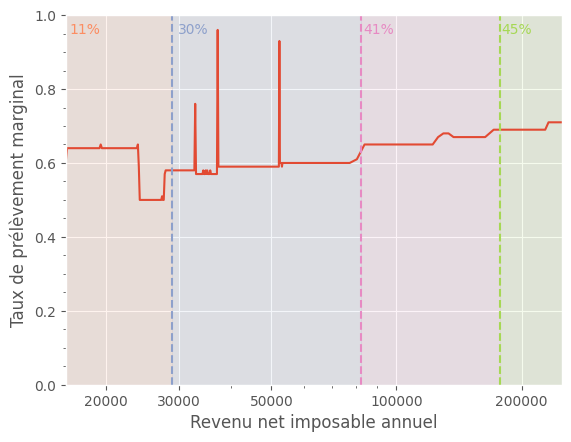

In [43]:
cmap = plt.color_sequences['Set2']
tranches = [(0, 0), (11294, 11), (28797, 30), (82342, 41), (177106, 45)]

fig, ax = plt.subplots()
ax.plot(df_temps_plein["revenu net imposable"], df_temps_plein["tx prelevement marginal"])
plt.xlim(16000, 250000)
plt.ylim(0,1)
for i, tranche in enumerate(tranches[:-1]):
    if i == 0: continue
    x_section = np.linspace(tranche[0], tranches[i+1][0], 100)
    plt.fill_between(x_section, 0, 1, color=cmap[i], alpha=0.1)
    plt.axvline(x=tranche[0], color=cmap[i], linestyle='--')
    if i == 1:
        plt.text(tranche[0]+5000,0.95, f"{tranche[1]}%", color=cmap[i])
    else:
        plt.text(tranche[0]+1000,0.95, f"{tranche[1]}%", color=cmap[i])
max_x = max(df_temps_plein["revenu net imposable"])
tranche = tranches[-1]
i = len(tranches) - 1
x_section = np.linspace(tranche[0], max_x, 100)
plt.fill_between(x_section, 0, 1, color=cmap[i], alpha=0.1)
plt.axvline(x=tranche[0], color=cmap[i], linestyle='--')
plt.text(tranche[0]+2000,0.95, f"{tranche[1]}%", color=cmap[i])

plt.xlabel("Revenu net imposable annuel")
plt.ylabel("Taux de prélèvement marginal")


plt.xscale("log")
plt.minorticks_on()
ax.xaxis.set_major_locator(ticker.FixedLocator([20000,30000,50000,100000,200000]))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(custom_smic_formatter))
plt.show()

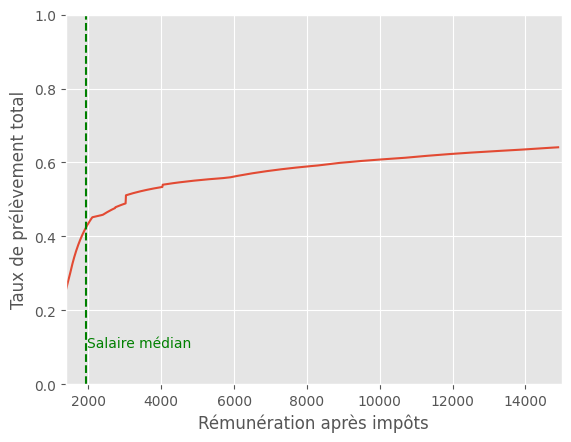

In [44]:
cmap = plt.color_sequences['tab10']

fig, ax = plt.subplots()
plt.ylim(0,1)
plt.xlim(1377,15000)
ax.plot(df_temps_plein["rémunération après impôt"], df_temps_plein["tx prelevement total"])
plt.xlabel("Rémunération après impôts")
plt.ylabel("Taux de prélèvement total")
plt.axvline(x=1940, color='g', linestyle='--')
plt.text(1970,0.1, 'Salaire médian', color='g')
ax.xaxis.set_major_formatter(ticker.FuncFormatter(custom_smic_formatter))
plt.show()